In [1]:
import pandas as pd
import numpy as np
import IPython
import graphviz
import re
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz



# 1. Decision Tree by Hand

### For our baby case lets work through a tiny dataset

In [263]:
x = pd.DataFrame({'feature':[1,2,3,4,5,6]})
x_vec = np.array([1,2,3,4,5,6], dtype=int)
y = np.array([1,1,0,1,0,0], dtype=int)

####  The Decision Tree Algorithm - in English

1. Target: Looking for a division of the dataset where mostly `1`'s on one side and mostly `0`'s on other side
2. Will check every element and separate the set into a left handed group and a right handed group and calculate a 'purity' score
3. will loop and search for the **lowest** score

### i=1, Split at 1st element

In [264]:
lhs_x = x_vec<=x_vec[0]
rhs_x = x_vec>x_vec[0]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)

[ True False False False False False] [False  True  True  True  True  True] [1] [1 0 1 0 0]


### i=1, Calculate the purity score

$$\sigma_{ylhs}n_{xlhs} + \sigma_{yrhs}n_{xrhs} $$

The score is roughly the standard deviation of the y times the number of samples. Lets consider the extremes:

1. If the split is perfect, one side will have all 1's and the other will have all 0's, the deviations will equal =0 and the score will be zero
2. If the split is terrible, we will have a huge deviation times a large number of points that will give a very large score

In [265]:
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

2.4494897427831783

### i=2, Split at 2nd element

In [266]:
lhs_x = x_vec<=x_vec[1]
rhs_x = x_vec>x_vec[1]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)

[ True  True False False False False] [False False  True  True  True  True] [1 1] [0 1 0 0]


### i=2, Calculate the score

In [267]:
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

1.7320508075688772

### i=3, Split at 3rd element

In [268]:
lhs_x = x_vec<=x_vec[2]
rhs_x = x_vec>x_vec[3]
lhs_y = y[lhs_x]
rhs_y = y[rhs_x]

print(lhs_x, rhs_x,lhs_y,rhs_y)
np.std(lhs_y) * sum(lhs_x) + np.std(rhs_y) * sum(rhs_x)

[ True  True  True False False False] [False False False False  True  True] [1 1 0] [0 0]


1.4142135623730949

### Conclusion: it seems that element 2~3 is a good split, with 2 samples going left, and 4 going right!

### Let's compare to sklearn! We will use 1 decision tree with depth 1

In [168]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Tree Drawing function!

In [169]:
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))


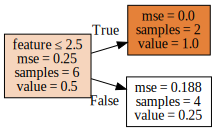

In [170]:
draw_tree(dtr, x, precision=3)

### We see we are consistent with sklearn

# On to the real Data:

In [152]:
train_df = pd.read_csv('./train (1).csv')
df_test = pd.read_csv('./test (1).csv')

### For simplicity lets choose only a few features

In [153]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Let's select YrSold, General Living Area, Total Rooms Above Ground

In [229]:
sample_df = train_df[['SalePrice','YrSold','GrLivArea','TotRmsAbvGrd']].copy()
sample_df.head()

,SalePrice,YrSold,GrLivArea,TotRmsAbvGrd
0,208500,2008,1710,8
1,181500,2007,1262,6
2,223500,2008,1786,6
3,140000,2006,1717,7
4,250000,2008,2198,9


## Split into X and y variables

In [230]:
y_train = sample_df['SalePrice']
X_train = sample_df[[x for x in sample_df.columns if x != 'SalePrice']]

In [231]:
print(y_train.shape, X_train.shape)

(1460,) (1460, 3)


### Make a Decision Tree with Depth 1

In [232]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Lets see what the Sklearn Decided

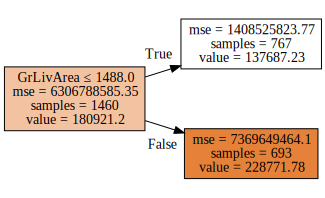

In [233]:
draw_tree(dtr, X_train, precision=2)

### Splitting Algorithm : First for one feature

####  English
1. Target: Looking for a division of the dataset where mostly 1's on one side and mostly 0's on other side
2. Will check every element and separate the set into a left handed group and a right handed group and calculate a 'purity' score
3. will loop and search for the lowest score

#### Score Calculation:

    - left_grp_Ytrain_deviation * left_Xtrain_sum + right_grp_Ytrain_deviation * right_Xtrain_sum

#### Python Explicit Code: Setup
- `feature_idx =1` : we can choose which feature we want to look at 
- `stored_score = float('inf')` : choose a very high starter score
- `stored_split_feature = 0` this is redundant right now, but it would be the idea feature to split on
- `stored_split_value = 0` - this is the actual data-frame value to split on, for us `GrLivArea` is in ft
- `all_indexes = [x for x in X_train.index]` : makes list of all possible indexes
- `feature_list = X_train.columns` - feature list of column names, for labeling

#### Datasetup

- `x,y = X_train.iloc[all_indexes,feature_idx],y_train.values[all_indexes]` pulls out the actual values

#### Split logic: for a given index

##### X values split
- `lhs_x = x<=x[split_index]` : for whatever split value you are at, how many values are less
- `rhs_x = x>x[split_index]` : how many values are above the selected value

##### y values split
- `lhs_y_std = y[lhs_x].std()` : the stdev of the left hand y values
- `rhs_x_std = y[rhs_x].std()` : the stdev of the right hand y values

##### Calc the score
- `curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()` 

##### If score is better, store the data

```python
 if curr_score<stored_score: 
            print('split index :%d lhs ct: %d | rhs ct: %d| %f' % (split_index, 
                                                                   len(lhs_x),
                                                                   len(rhs_x), 
                                                                   curr_score))
            stored_split_feature = feature_idx
            stored_score = curr_score
            stored_split_value = x[split_index]
```


### A manual loop 

In [234]:
feature_idx =1
stored_score = float('inf')
stored_split_feature = 0
stored_split_value = 0

all_indexes = [x for x in X_train.index]

feature_list = X_train.columns
x,y = X_train.iloc[all_indexes,feature_idx],y_train.values[all_indexes]

print('start loop')
for split_index in range(1, x.shape[0]-1):
    lhs_x = x<=x[split_index]
    rhs_x = x>x[split_index]

    if rhs_x.sum()==0:
        continue
    else:
        lhs_y_std = y[lhs_x].std()
        rhs_y_std = y[rhs_x].std()

        curr_score = lhs_y_std*lhs_x.sum() + rhs_y_std*rhs_x.sum()
        
        if curr_score<stored_score: 
            print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
            stored_split_feature = feature_idx
            stored_score = curr_score
            stored_split_value = x[split_index]


print(stored_score, feature_list[stored_split_feature], stored_split_value)

start loop
split index :1 lhs ct: 512 | rhs ct: 948| score: 93281398.205757
split index :2 lhs ct: 1101 | rhs ct: 359| score: 91804469.340026
split index :3 lhs ct: 1037 | rhs ct: 423| score: 91487146.514272
split index :5 lhs ct: 618 | rhs ct: 842| score: 90970171.513650
split index :6 lhs ct: 1008 | rhs ct: 452| score: 90944631.172519
split index :13 lhs ct: 778 | rhs ct: 682| score: 88899549.318965
split index :67 lhs ct: 755 | rhs ct: 705| score: 88506980.330170
split index :239 lhs ct: 767 | rhs ct: 693| score: 88277501.801643
88277501.8016 GrLivArea 1487


### Lets turn it into a class with a single function

- **Tricky hard to change `variables` to `self.variables`:** be sure to keep track of these, its hard to find and replace all of them. I highly recommend restartting your kernel to make sure old variable values don't remain from a previous calculation and then fail to throw an error when prototyping your tree 

- **Dont repeat yourself** try to streamline as much as possible

- **Don't send data to functions in the same class**: when acting on the data, always use the `self.` versions. The persistence between functions (all functions can access the same data) will help avoid version issues and naming problems

In [235]:

class myIndecisionTree():
    def __init__(self,x,y):
        self.indexes = x.index
        self.x = x
        self.y = y
        self.feature_idx =1
        self.stored_score = float('inf')
        self.stored_split_feature = 0
        self.stored_split_value = 0
        self.feature_list = x.columns
    
    def find_split_in_single_feature(self, feature_idx):
        X_train = self.x
        y_train = self.y

        x,y = X_train.iloc[self.indexes,feature_idx],y_train.values[self.indexes]
        print('start loop')
        for split_index in range(1, self.x.shape[0]-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                print(self.stored_score, feature_list[self.stored_split_feature], self.stored_split_value)
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()
                if curr_score<self.stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
                    self.stored_split_feature = feature_idx
                    self.stored_score = curr_score
                    self.stored_split_value = x[split_index]

        print(self.stored_score, self.feature_list[self.stored_split_feature], self.stored_split_value)


In [236]:
93281398.2058 < float('inf')

True

In [237]:
myTree = myIndecisionTree(X_train,y_train)
myTree.find_split_in_single_feature(1)

start loop
split index :1 lhs ct: 512 | rhs ct: 948| score: 93281398.205757
split index :2 lhs ct: 1101 | rhs ct: 359| score: 91804469.340026
split index :3 lhs ct: 1037 | rhs ct: 423| score: 91487146.514272
split index :5 lhs ct: 618 | rhs ct: 842| score: 90970171.513650
split index :6 lhs ct: 1008 | rhs ct: 452| score: 90944631.172519
split index :13 lhs ct: 778 | rhs ct: 682| score: 88899549.318965
split index :67 lhs ct: 755 | rhs ct: 705| score: 88506980.330170
split index :239 lhs ct: 767 | rhs ct: 693| score: 88277501.801643
88277501.8016 GrLivArea 1487
88277501.8016 GrLivArea 1487


### Make a function for all features

Note that when we call this function we don't have to keep passing around updated scores or split values. That is taken care of by using the `self.` notation. 

In [258]:
class myIndecisionTree():
    def __init__(self,x,y):
        self.indexes = x.index
        self.x = x
        self.y = y
        # self.feature_idx =1
        self.stored_score = float('inf')
        self.stored_split_feature = 0
        self.stored_split_value = 0
        self.feature_list = x.columns

    
    # ======== NEW FUNCTION =========================
    def check_all_features(self):
        for i in range(len(feature_list)-1):
            self.find_split_in_single_feature(i)  
            
        print(self.stored_score, self.feature_list[self.stored_split_feature], self.stored_split_value)
    # ======== NEW FUNCTION =========================    
    
    def find_split_in_single_feature(self, feature_idx):
        X_train = self.x
        y_train = self.y

        x,y = X_train.iloc[self.indexes,feature_idx],y_train.values[self.indexes]
        print('start loop')
        for split_index in range(1, self.x.shape[0]-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                continue
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()
                if curr_score<self.stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
                    self.stored_split_feature = feature_idx
                    self.stored_score = curr_score
                    self.stored_split_value = x[split_index]

        


### Test it with a different data set - Single Decision Tree

In [259]:
y_train = sample_df['SalePrice']
#X_train = sample_df[['GrLivArea']]
X_train = sample_df[[x for x in sample_df.columns if x not in ['SalePrice','GrLivArea']]]

In [260]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

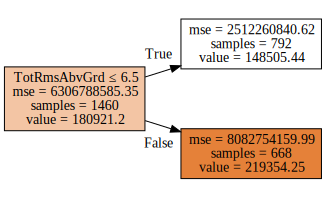

In [261]:
draw_tree(dtr, X_train, precision=2)

In [262]:
myTree = myIndecisionTree(X_train,y_train)
myTree.check_all_features()

start loop
split index :1 lhs ct: 643 | rhs ct: 817| score: 115781552.380532
start loop
split index :1 lhs ct: 792 | rhs ct: 668| score: 99752951.757499
99752951.7575 TotRmsAbvGrd 6


## Let's make it nestable

And make provisions for indexes to be passed through

In [253]:
class myIndecisionTree():
    def __init__(self,x,y, indexes==None, min_leaf=5):
        if indexes == None:
            self.indexes = x.index
        else:
            self.indexes = indexes
        self.x = x
        self.y = y

        self.stored_score = float('inf')
        self.stored_split_feature = 0
        self.stored_split_value = 0
        self.feature_list = x.columns

    
    def check_all_features(self):
        for i in range(len(feature_list)-1):
            self.find_split_in_single_feature(i)  
            
        print(self.stored_score, self.feature_list[self.stored_split_feature], self.stored_split_value)
    
    def find_split_in_single_feature(self, feature_idx):
        X_train = self.x
        y_train = self.y

        x,y = X_train.iloc[self.indexes,feature_idx],y_train.values[self.indexes]
        print('start loop')
        for split_index in range(1, self.x.shape[0]-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                continue
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()
                if curr_score<self.stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, sum(lhs_x),sum(rhs_x), curr_score))
                    self.stored_split_feature = feature_idx
                    self.stored_score = curr_score
                    self.stored_split_value = x[split_index]

        


In [384]:
myDecTree(X_train, y_train)

---YrSold---
split index :1 lhs ct: 1460 | rhs ct: 1460| score: 115781552.380532
115781552.381 YrSold 2007
---GrLivArea---
split index :1 lhs ct: 1460 | rhs ct: 1460| score: 93281398.205757
split index :2 lhs ct: 1460 | rhs ct: 1460| score: 91804469.340026
split index :3 lhs ct: 1460 | rhs ct: 1460| score: 91487146.514272
split index :5 lhs ct: 1460 | rhs ct: 1460| score: 90970171.513650
split index :6 lhs ct: 1460 | rhs ct: 1460| score: 90944631.172519
split index :13 lhs ct: 1460 | rhs ct: 1460| score: 88899549.318965
split index :67 lhs ct: 1460 | rhs ct: 1460| score: 88506980.330170
split index :239 lhs ct: 1460 | rhs ct: 1460| score: 88277501.801643
88277501.8016 GrLivArea 1487
---MSSubClass---
88277501.8016 GrLivArea 1487
---TotRmsAbvGrd---
88277501.8016 GrLivArea 1487
---OverallCond---
88277501.8016 GrLivArea 1487
88277501.8016 1 1487


In [385]:
myDecTree(X_train, y_train, [x for x in range(100)])

---YrSold---
split index :1 lhs ct: 100 | rhs ct: 100| score: 6776738.003673
split index :3 lhs ct: 100 | rhs ct: 100| score: 6728372.189336
6728372.18934 YrSold 2006
---GrLivArea---
split index :1 lhs ct: 100 | rhs ct: 100| score: 5544749.917601
split index :5 lhs ct: 100 | rhs ct: 100| score: 4995598.238723
split index :48 lhs ct: 100 | rhs ct: 100| score: 4965895.299135
4965895.29913 GrLivArea 1452
---MSSubClass---
4965895.29913 GrLivArea 1452
---TotRmsAbvGrd---
4965895.29913 GrLivArea 1452
---OverallCond---
4965895.29913 GrLivArea 1452
4965895.29913 1 1452


## Let's make it a multi-level tree class

In [473]:
b = np.arange(10)

In [477]:
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [480]:
z=np.nonzero(b>5)[0]

In [481]:
z

array([6, 7, 8, 9])

In [476]:
b[[1,2,3,5]]

array([1, 2, 3, 5])

In [492]:
b[z]

array([6, 7, 8, 9])

In [487]:
class myNestedDecTree():
    def __init__(self, x, y, idxs=None, min_leaf=5):
        if idxs is None:
            idxs = np.arange(len(y))
        
        self.x = x
        self.y = y
        self.idxs = idxs
        self.min_leaf = min_leaf
        self.n = len(idxs)
        self.column_ct = x.shape[1]
        self.mean_value = np.mean(y[idxs])
        self.stored_score = float('inf')
        self.stored_score, self.split_feature_idx, self.split_value = self.find_split(x.iloc[idxs],y.iloc[idxs])
        
    @property
    def get_feature_values(self): 
        return self.x.values[self.idxs,self.split_feature_idx]
    
    @property
    def get_feature_names(self): return self.x.columns[self.var_idx]

    @property
    def is_leaf(self): return self.stored_score == float('inf')
    
    
    def find_split(self, X_train, y_train):
        stored_score = float('inf')
        stored_split_feature = None
        stored_split_value = None
        feature_list = X_train.columns

        for k in range(len(feature_list)):
            print('---%s---' %feature_list[k],)
            stored_score, stored_split_feature, stored_split_value = self.find_split_in_single_feature(X_train, y_train, stored_score, stored_split_feature, stored_split_value, k)
        
        print('now')
        # =========== NEW CODE ============
        if stored_score == float('inf'): 
            return
        else:
            x = self.x.values[self.idxs, stored_split_feature]
            print(stored_split_value)
            lhs_indexes = np.nonzero(x<=stored_split_value)[0]
            rhs_indexes = np.nonzero(x>stored_split_value)[0]

            ### recursive call
            print('hi left')
            print(lhs_indexes, type(lhs_indexes))
            print(self.idxs[lhs_indexes])
            self.lhs_tree = myNestedDecTree(self.x, self.y, self.idxs[lhs_indexes])
            print('hi right')
            self.rhs_tree = myNestedDecTree(self.x, self.y, self.idxs[rhs_indexes])
            # =========== END =================

            print(stored_score, stored_split_feature, stored_split_value)
            return(stored_score, stored_split_feature, stored_split_value)

    
    def predict_row(self, xi):
        if self.is_leaf: 
            return self.mean_value
        else:
            t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
            return t.predict_row(xi)
    
    
    def find_split_in_single_feature(self,
                                     X_train, 
                                     y_train, 
                                     stored_score, 
                                     stored_split_feature, 
                                     stored_split_value,
                                     feature_idx):
        all_indexes = [x for x in X_train.index]

        feature_list = X_train.columns
        x,y = X_train.iloc[all_indexes,feature_idx],y_train.values[all_indexes]

        for split_index in range(1, n-1):
            lhs_x = x<=x[split_index]
            rhs_x = x>x[split_index]

            if rhs_x.sum()==0:
                print(stored_score, feature_list[stored_split_feature], stored_split_value)
                return stored_score, stored_split_feature, stored_split_value
            else:
                lhs_y_std = y[lhs_x].std()
                rhs_x_std = y[rhs_x].std()

                curr_score = lhs_y_std*lhs_x.sum() + rhs_x_std*rhs_x.sum()

                if curr_score<stored_score: 
                    print('split index :%d lhs ct: %d | rhs ct: %d| score: %f' % (split_index, len(lhs_x),len(rhs_x), curr_score))
                    stored_split_feature = feature_idx
                    stored_score = curr_score
                    stored_split_value = x[split_index]

        print(stored_score, feature_list[stored_split_feature], stored_split_value)
        return stored_score, stored_split_feature, stored_split_value
        

In [488]:
y_train = sample_df['SalePrice']
X_train = sample_df[[x for x in sample_df.columns if x not in ['SalePrice']]]

In [489]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

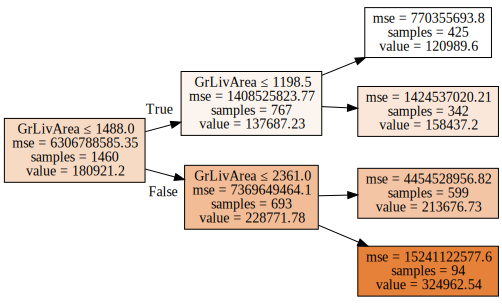

In [490]:
draw_tree(dtr, X_train, precision=2)

In [491]:
mdt = myNestedDecTree(X_train, y_train, [x for x in range(100)])

---YrSold---
split index :1 lhs ct: 100 | rhs ct: 100| score: 6776738.003673
split index :3 lhs ct: 100 | rhs ct: 100| score: 6728372.189336
6728372.18934 YrSold 2006
---GrLivArea---
split index :1 lhs ct: 100 | rhs ct: 100| score: 5544749.917601
split index :5 lhs ct: 100 | rhs ct: 100| score: 4995598.238723
split index :48 lhs ct: 100 | rhs ct: 100| score: 4965895.299135
4965895.29913 GrLivArea 1452
---MSSubClass---
4965895.29913 GrLivArea 1452
---TotRmsAbvGrd---
4965895.29913 GrLivArea 1452
---OverallCond---
4965895.29913 GrLivArea 1452
now
1452
hi left
[ 1  5  9 10 12 14 15 16 17 18 19 21 23 24 26 29 30 31 32 36 37 38 39 40 41
 42 43 44 48 49 51 52 54 55 59 60 61 62 68 71 73 75 76 77 79 81 83 87 89 90
 91 92 97 98 99] <class 'numpy.ndarray'>


TypeError: only integer scalar arrays can be converted to a scalar index

## Let's make it a multi-level tree class

In [471]:
draw_tree(mdt, X_train)

TypeError: <__main__.myDecTree object at 0x1a22678a20> is not an estimator instance.

## Now an ensemble of trees

In [ ]:
class myTreeEnsemble():
    def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
        np.random.seed(42)
        self.x = x
        self.y = y
        self.sample_sz = sample_sz
        self.min_leaf = min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]
    
    def create_tree(self):
        # get random indexes
        rnd_idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        
        # then return a decision tree based on a random dataset
        return DecisionTree(self.x.iloc[rnd_idxs], self.y[rnd_idxs], min_leaf=self.min_leaf)
        
    def predict(self, x):
        
        # currently returning the mean of the prediction of all the 
        # trees
        return np.mean([t.predict(x) for t in self.trees], axis=0)
1.2 Decision Tree Version 1